# Data Understanding
### This dataset provides records of: Paid/Free services, Spend amount (expenses/costs) in USD, Visit sessions count , Orders amount, Revenue in USD, for the course of two weeks on 9 different channels.
#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Conversion Rate (CR) = Orders/Visits (%)
#### Average Basket Size (ABS) = Revenue/Orders 
#### Cost to Income Ratio (CIR) = Spend/Revenue 

# Libraries
#### "matplotlib" library is used for graph and plots
#### "pandas" library is used for dataframe creation/manipulation 

In [55]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from operator import truediv

# Quick view on dataset

In [56]:
df = pd.read_csv('DA_TestDS.csv')

In [57]:
df.dtypes

Channel name    object
Paid/Free       object
Spend in $       int64
Visits          object
Orders          object
Revenue in $    object
Week             int64
dtype: object

In [58]:
df.shape

(18, 7)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel name  18 non-null     object
 1   Paid/Free     18 non-null     object
 2   Spend in $    18 non-null     int64 
 3   Visits        18 non-null     object
 4   Orders        18 non-null     object
 5   Revenue in $  18 non-null     object
 6   Week          18 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.1+ KB


In [60]:
df.describe()

,Spend in $,Week
count,18.000000,18.000000
mean,1163.888889,42.500000
std,1281.323116,0.514496
min,55.000000,42.000000
25%,90.000000,42.000000
50%,600.000000,42.500000
75%,2384.000000,43.000000
max,3345.000000,43.000000


In [61]:
df

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week
0,App install network A,Paid,2978,"50,000",550,"32,615",42
1,App install network B,Paid,2342,"600,000","7,200","398,160",42
2,App install network C,Paid,3345,"500,000","5,000","235,000",42
3,Web channel A,Paid,3008,"300,000","3,900","121,680",42
4,Web channel B,Paid,600,"30,000",360,"19,584",42
5,Web channel C,Paid,88,"50,000",550,"28,930",42
6,Newsletters A,Free,90,"60,000",660,"36,432",42
7,Newsletters B,Free,98,"250,000","2,750","91,025",42
8,PR,Free,76,"25,000",250,"9,900",42
9,App install network A,Paid,309,"40,000",715,"39,138",43


# Data Prepration

In [62]:
df = df.replace(',','', regex=True)  # removing commas 
df.Orders = pd.to_numeric(df.Orders) # converting dataframe from string to integer
df[["Visits", "Revenue in $"]] = df[["Visits", "Revenue in $"]].apply(pd.to_numeric)

In [63]:
df2w = df.groupby("Channel name").sum()
# df2w = df.groupby('Channel name')['Visits', 'Visits'].apply(lambda x : x.astype(int).sum())
# df2w = df.groupby(['Channel name']).sum(['Visits'], ['Visits'])

del df2w['Week']
df2w

,Spend in $,Visits,Orders,Revenue in $
Channel name,,,,
App install network A,3287,90000,1265,71753
App install network B,3351,1080000,16560,676872
App install network C,5743,950000,9000,540500
Newsletters A,168,108000,1320,72864
Newsletters B,188,575000,6325,200255
PR,131,50000,475,17820
Web channel A,6106,540000,6630,219024
Web channel B,1200,51000,720,45043
Web channel C,776,85000,1155,54967


In [64]:
df2w_sorted = df2w.sort_values('Visits')
df2w_sorted.Visits = df2w_sorted.Visits/1000000
df2w_sorted.rename(columns={'Visits': 'Visits (M)'}, inplace=True)
df2w_sorted

,Spend in $,Visits (M),Orders,Revenue in $
Channel name,,,,
PR,131,0.050,475,17820
Web channel B,1200,0.051,720,45043
Web channel C,776,0.085,1155,54967
App install network A,3287,0.090,1265,71753
Newsletters A,168,0.108,1320,72864
Web channel A,6106,0.540,6630,219024
Newsletters B,188,0.575,6325,200255
App install network C,5743,0.950,9000,540500
App install network B,3351,1.080,16560,676872


# Plots on Visits/Orders, Orders/Revenue, Spend/Revenue

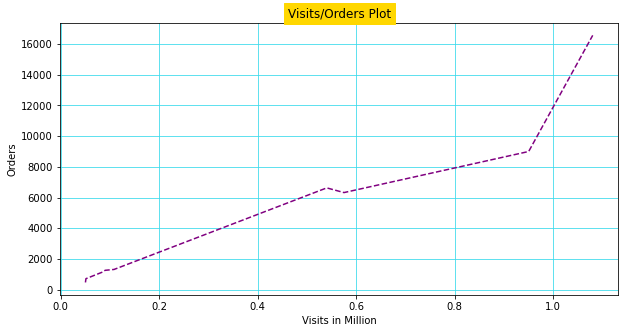

In [65]:
plt.subplots(figsize=(10, 5))
plt.plot(df2w_sorted['Visits (M)'], df2w_sorted.Orders, linestyle='dashed',color= 'purple')
plt.title('Visits/Orders Plot', backgroundcolor= 'gold')
plt.xlabel('Visits in Million')
plt.ylabel('Orders')
plt.grid(True, color='#39DAEC')
plt.show()

#### ↑ ↑ The above plot, shows an obvious growth in number of orders against visit sessions; which simply translates to more orders for more visits. (access to more data/records, can help in better understanding and demonstration of Conversion Rate (CR) ).

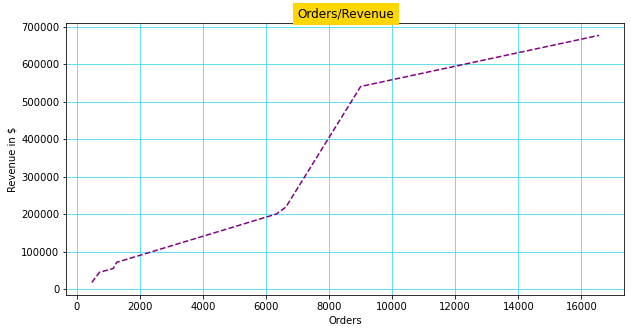

In [66]:
plt.subplots(figsize=(10, 5))
df2w_sorted = df2w.sort_values('Orders')
plt.plot(df2w_sorted['Orders'], df2w_sorted['Revenue in $'], linestyle='dashed',color= 'purple')
plt.title('Orders/Revenue', backgroundcolor= 'gold')
plt.xlabel('Orders')
plt.ylabel('Revenue in $')
plt.grid(True, color='#39DAEC')

#### ↑ ↑ The above plot, shows a growth in Revenue for order values; which also translates to higher revenue for an increase in  orders. (access to more data/records, can help in better understanding and demonstration of Average Basket Size (ABS) ).

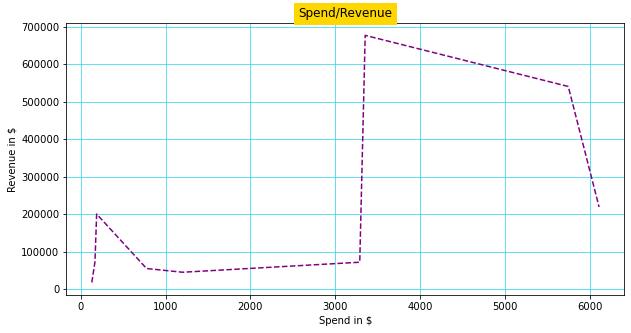

In [67]:
plt.subplots(figsize=(10, 5))
df2w_sorted = df2w.sort_values('Spend in $')
plt.plot(df2w_sorted['Spend in $'], df2w_sorted['Revenue in $'], linestyle='dashed',color= 'purple')
plt.title('Spend/Revenue', backgroundcolor= 'gold')
plt.xlabel('Spend in $')
plt.ylabel('Revenue in $')
plt.grid(True, color='#39DAEC')

#### ↑ ↑ The above plot, shows the revenue measures with respect to Spend amounts. (access to more data/records, can help in better understanding and demonstration of Cost to Income Ratio (CIR) ).

# Order distribution per channel over the course of 2 weeks

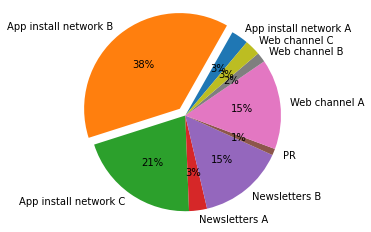

In [68]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0)
pie_val = df2w["Orders"]
plt.pie(df2w["Orders"], labels=df2w.index, radius=1.1, startangle=50, autopct='%.0f%%', explode=explode)
plt.title('')
plt.show()

#### ↑↑ The above piechart displays a quick view on order distribution for each channels. We can observe a higher order amounts for "App install newtwork B" followed by "App install network C", "Web channel A" and "Newsletters B".

In [69]:
df.dtypes

Channel name    object
Paid/Free       object
Spend in $       int64
Visits           int64
Orders           int64
Revenue in $     int64
Week             int64
dtype: object

# Order distribution per channel for each week
#### In this section we can have a view on order distribution for each week. (More records can help with understanding of the trends on the order values.) 

In [70]:
w42 = df[df['Week'] == 42]
w43 = df[df['Week'] == 43]

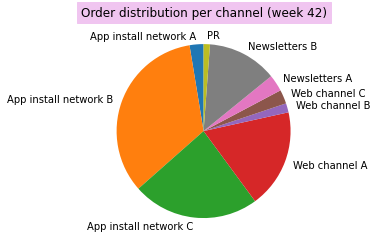

In [71]:
plt.pie(w42.Orders, labels=w42["Channel name"], startangle=90)
plt.title('Order distribution per channel (week 42)', backgroundcolor='#f0c5f0')

plt.show()

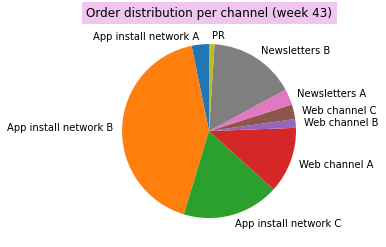

In [72]:
plt.pie(w43.Orders, labels=w43["Channel name"], startangle=90)
plt.title('Order distribution per channel (week 43)', backgroundcolor='#f0c5f0')

plt.show()

# Calculating "Conversion Rate (CR)"

In [73]:
crw42 = [round((x/y)*100, 2) for x, y in zip(map(int, w42.Orders), map(int, w42.Visits))] # using formula to calculate CR
w42['Conversion Rate (CR) %'] = crw42 # adding cr column to the dataframe

crw43 = [round((x/y)*100, 2) for x, y in zip(map(int, w43.Orders), map(int, w43.Visits))] # using formula to calculate CR
w43['Conversion Rate (CR) %'] = crw43 # adding cr column to the dataframe

C:\Users\Satar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Satar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
w42

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week,Conversion Rate (CR) %
0,App install network A,Paid,2978,50000,550,32615,42,1.1
1,App install network B,Paid,2342,600000,7200,398160,42,1.2
2,App install network C,Paid,3345,500000,5000,235000,42,1.0
3,Web channel A,Paid,3008,300000,3900,121680,42,1.3
4,Web channel B,Paid,600,30000,360,19584,42,1.2
5,Web channel C,Paid,88,50000,550,28930,42,1.1
6,Newsletters A,Free,90,60000,660,36432,42,1.1
7,Newsletters B,Free,98,250000,2750,91025,42,1.1
8,PR,Free,76,25000,250,9900,42,1.0


In [75]:
w43

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week,Conversion Rate (CR) %
9,App install network A,Paid,309,40000,715,39138,43,1.79
10,App install network B,Paid,1009,480000,9360,278712,43,1.95
11,App install network C,Paid,2398,450000,4000,305500,43,0.89
12,Web channel A,Paid,3098,240000,2730,97344,43,1.14
13,Web channel B,Paid,600,21000,360,25459,43,1.71
14,Web channel C,Paid,688,35000,605,26037,43,1.73
15,Newsletters A,Free,78,48000,660,36432,43,1.38
16,Newsletters B,Free,90,325000,3575,109230,43,1.10
17,PR,Free,55,25000,225,7920,43,0.90


# Calculating "Average Basket Size (ABS)"

In [76]:
absw42 = [round(x/y, 2) for x, y in zip(map(int, w42["Revenue in $"]), map(int, w42.Orders))]
w42['Average Basket Size (ABS)'] = absw42 # adding abs column to the dataframe

absw43 = [round(x/y, 2) for x, y in zip(map(int, w43["Revenue in $"]), map(int, w43.Orders))]
w43['Average Basket Size (ABS)'] = absw43 # adding abs column to the dataframe

C:\Users\Satar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Satar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Calculating "Cost to Income Ratio (CIR)"

In [77]:
cirw42 = [round(x/y, 4) for x, y in zip(map(int, w42["Spend in $"] ), map(int, w42["Revenue in $"]))]
w42['Cost to Income Ratio (CIR)'] = cirw42 # adding cir column to the dataframe

cirw43 = [round(x/y, 4) for x, y in zip(map(int, w43["Spend in $"] ), map(int, w43["Revenue in $"]))]
w43['Cost to Income Ratio (CIR)'] = cirw43 # adding cir column to the dataframe

C:\Users\Satar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Satar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Updated dataframe

In [78]:
w42

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week,Conversion Rate (CR) %,Average Basket Size (ABS),Cost to Income Ratio (CIR)
0,App install network A,Paid,2978,50000,550,32615,42,1.1,59.3,0.0913
1,App install network B,Paid,2342,600000,7200,398160,42,1.2,55.3,0.0059
2,App install network C,Paid,3345,500000,5000,235000,42,1.0,47.0,0.0142
3,Web channel A,Paid,3008,300000,3900,121680,42,1.3,31.2,0.0247
4,Web channel B,Paid,600,30000,360,19584,42,1.2,54.4,0.0306
5,Web channel C,Paid,88,50000,550,28930,42,1.1,52.6,0.0030
6,Newsletters A,Free,90,60000,660,36432,42,1.1,55.2,0.0025
7,Newsletters B,Free,98,250000,2750,91025,42,1.1,33.1,0.0011
8,PR,Free,76,25000,250,9900,42,1.0,39.6,0.0077


In [79]:
w43

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week,Conversion Rate (CR) %,Average Basket Size (ABS),Cost to Income Ratio (CIR)
9,App install network A,Paid,309,40000,715,39138,43,1.79,54.74,0.0079
10,App install network B,Paid,1009,480000,9360,278712,43,1.95,29.78,0.0036
11,App install network C,Paid,2398,450000,4000,305500,43,0.89,76.38,0.0078
12,Web channel A,Paid,3098,240000,2730,97344,43,1.14,35.66,0.0318
13,Web channel B,Paid,600,21000,360,25459,43,1.71,70.72,0.0236
14,Web channel C,Paid,688,35000,605,26037,43,1.73,43.04,0.0264
15,Newsletters A,Free,78,48000,660,36432,43,1.38,55.20,0.0021
16,Newsletters B,Free,90,325000,3575,109230,43,1.10,30.55,0.0008
17,PR,Free,55,25000,225,7920,43,0.90,35.20,0.0069


# Horizontal barcharts for (CR), (ABS), (CIR) for week 42 & 43

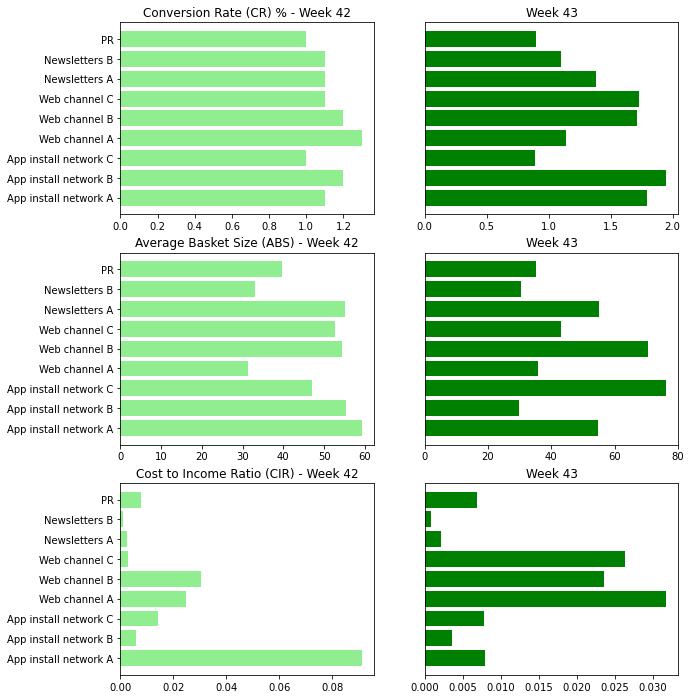

In [80]:
# col1 -- 

plt.figure(figsize=(10,12))
plt.subplot(3, 2, 1)
plt.barh(w42["Channel name"], crw42, color='lightgreen')
plt.title("Conversion Rate (CR) % - Week 42")

plt.subplot(3, 2, 3)
plt.barh(w42["Channel name"], absw42, color='lightgreen')
plt.title("Average Basket Size (ABS) - Week 42")

plt.subplot(3, 2, 5)
plt.barh(w42["Channel name"], cirw42, color='lightgreen')
plt.title("Cost to Income Ratio (CIR) - Week 42")

# col2 -- 

plt.subplot(3, 2, 2)
plt.barh(w43["Channel name"], crw43, color='green')
plt.yticks("")
plt.title("Week 43")

plt.subplot(3, 2, 4)
plt.barh(w43["Channel name"], absw43, color='green')
plt.yticks("")
plt.title("Week 43")


plt.subplot(3, 2, 6)
plt.barh(w43["Channel name"], cirw43, color='green')
plt.yticks("")
plt.title("Week 43")

plt.show()

# Separating week 42 and week 43 records

In [81]:
w42 = df[df['Week'] == 42]
w43 = df[df['Week'] == 43]

In [82]:
w42

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week
0,App install network A,Paid,2978,50000,550,32615,42
1,App install network B,Paid,2342,600000,7200,398160,42
2,App install network C,Paid,3345,500000,5000,235000,42
3,Web channel A,Paid,3008,300000,3900,121680,42
4,Web channel B,Paid,600,30000,360,19584,42
5,Web channel C,Paid,88,50000,550,28930,42
6,Newsletters A,Free,90,60000,660,36432,42
7,Newsletters B,Free,98,250000,2750,91025,42
8,PR,Free,76,25000,250,9900,42


In [83]:
w43

,Channel name,Paid/Free,Spend in $,Visits,Orders,Revenue in $,Week
9,App install network A,Paid,309,40000,715,39138,43
10,App install network B,Paid,1009,480000,9360,278712,43
11,App install network C,Paid,2398,450000,4000,305500,43
12,Web channel A,Paid,3098,240000,2730,97344,43
13,Web channel B,Paid,600,21000,360,25459,43
14,Web channel C,Paid,688,35000,605,26037,43
15,Newsletters A,Free,78,48000,660,36432,43
16,Newsletters B,Free,90,325000,3575,109230,43
17,PR,Free,55,25000,225,7920,43


# Horizontal barcharts for (CR), (ABS), (CIR) for two weeks stacked next to eachother 

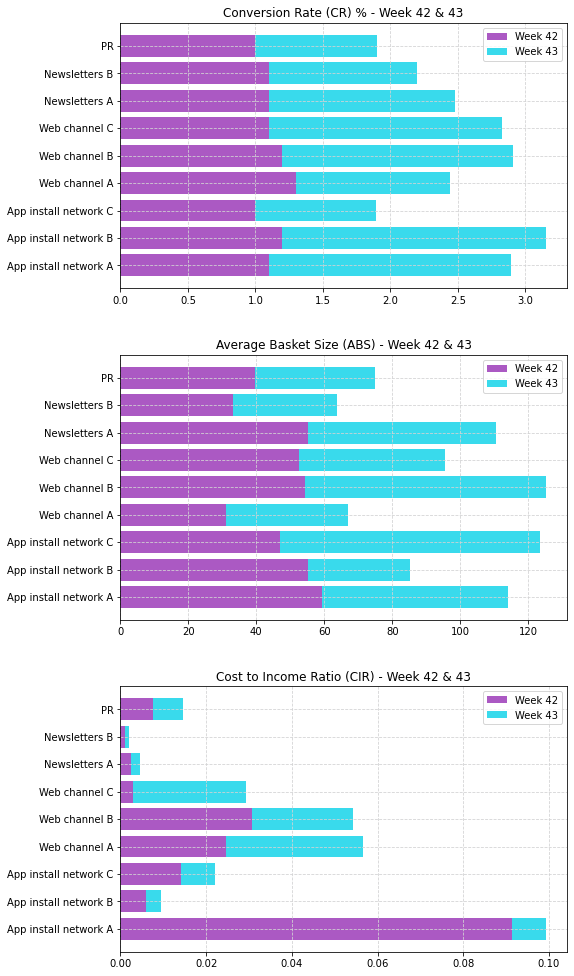

In [84]:
# plotting bars in stack 
plt.subplots(figsize=(8, 12))
plt.subplots_adjust(hspace = 0.25, top=1.2)

plt.subplot(3, 1, 1)
plt.barh(w42["Channel name"], crw42, color='#AB59C3', label='Week 42')
plt.barh(w43["Channel name"], crw43, left=crw42, color='#39DAEC', label='Week 43')
plt.legend()
plt.grid(True, color='#D3D3D4', linestyle="--")
plt.title("Conversion Rate (CR) % - Week 42 & 43")

plt.subplot(3, 1, 2)
plt.barh(w42["Channel name"], absw42, color='#AB59C3', label='Week 42')
plt.barh(w43["Channel name"], absw43, left=absw42, color='#39DAEC', label='Week 43')
plt.legend()
plt.grid(True, color='#D3D3D4', linestyle="--")
plt.title("Average Basket Size (ABS) - Week 42 & 43")

plt.subplot(3, 1, 3)
plt.barh(w42["Channel name"], cirw42, color='#AB59C3', label='Week 42')
plt.barh(w43["Channel name"], cirw43, left=cirw42, color='#39DAEC', label='Week 43')
plt.legend()
plt.grid(True, color='#D3D3D4', linestyle="--")
plt.title("Cost to Income Ratio (CIR) - Week 42 & 43")


plt.show()

# CR, CIR and ABS values for two weeks
#### In this section we can see the indicator values for the entire time (two weeks). 

In [85]:
cr2w = [round((x+y)/2, 2) for x, y in zip(map(float, crw42 ), map(float, crw43))]
abs2w = [round((x+y)/2, 2) for x, y in zip(map(float, absw42 ), map(float, absw43))]
cir2w = [round((x+y)/2, 4) for x, y in zip(map(float, cirw42 ), map(float, cirw43))]

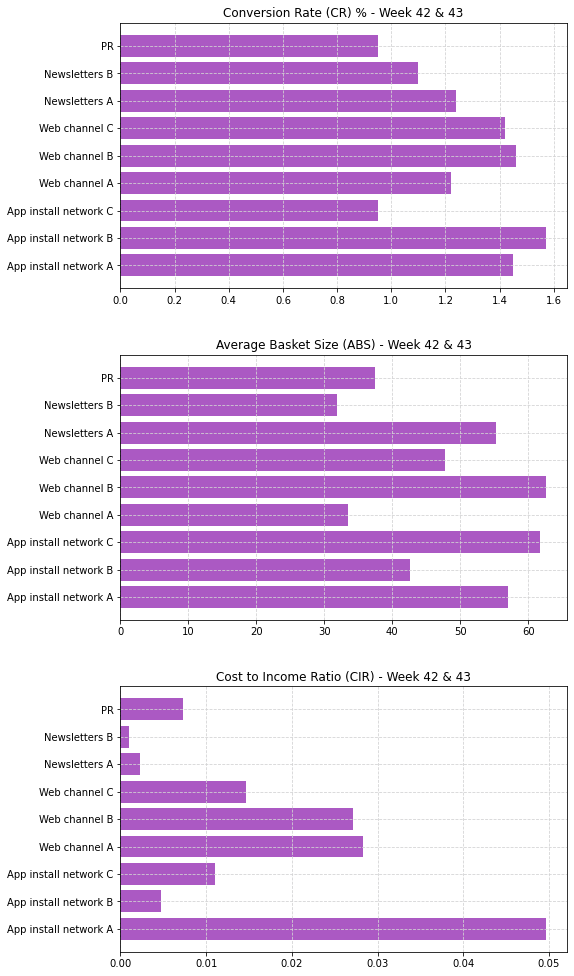

In [86]:
plt.subplots(figsize=(8, 12))
plt.subplots_adjust(hspace = 0.25, top=1.2)

plt.subplot(3, 1, 1)
plt.barh(w42["Channel name"], cr2w, color='#AB59C3')
plt.grid(True, color='#D3D3D4', linestyle="--")
plt.title("Conversion Rate (CR) % - Week 42 & 43")

plt.subplot(3, 1, 2)
plt.barh(w42["Channel name"], abs2w, color='#AB59C3')
plt.grid(True, color='#D3D3D4', linestyle="--")
plt.title("Average Basket Size (ABS) - Week 42 & 43")

plt.subplot(3, 1, 3)
plt.barh(w42["Channel name"], cir2w, color='#AB59C3')
plt.grid(True, color='#D3D3D4', linestyle="--")
plt.title("Cost to Income Ratio (CIR) - Week 42 & 43")


plt.show()